In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False
import astropy.units as u
import astropy.constants as c
import datetime

In [83]:
df=pd.read_csv("observatory_distances.csv")
df.head()

,Unnamed: 0,datetime_jd,datetime_str,Arecibo Telescope,Goldstone Radio Telescope,Green Bank Interferometer (GBI),Green Bank Telescope (GBT),Green Bank 140 Foot Telescope (140foot),Very Large Array (VLA),Very Long Baseline Array (VLBA),...,EDSCC,Tsukuba Space Center,Usuda Deep Space Center,GREAT,Okinawa Tracking and Communications Station,Masuda Tracking and Communications Station,Katsuura Tracking and Communications Station,Bisei Space Guard Center,Kamisaibara Space Guard Center,Uchinoura Space Center
0,0,2.462240e+06,2029-Apr-13 13:30,31.939220,31.381215,31.831009,31.831004,31.831041,31.494291,31.494284,...,30.858494,30.702620,30.710129,30.710131,30.632213,30.666222,30.689203,30.710202,30.710202,30.675374
1,1,2.462240e+06,2029-Apr-13 13:35,31.670129,31.115787,31.561720,31.561715,31.561750,31.229028,31.229021,...,30.568536,30.414375,30.421358,30.421356,30.339626,30.374870,30.400958,30.419906,30.419906,30.384092
2,2,2.462240e+06,2029-Apr-13 13:40,31.400701,30.850400,31.292218,31.292214,31.292247,30.963736,30.963729,...,30.278902,30.126525,30.132976,30.132971,30.047431,30.083908,30.113113,30.129992,30.129992,30.093197
3,3,2.462240e+06,2029-Apr-13 13:45,31.130929,30.585047,31.022497,31.022493,31.022525,30.698409,30.698402,...,29.989598,29.839077,29.844991,29.844981,29.755638,29.793344,29.825675,29.840466,29.840466,29.802698
4,4,2.462240e+06,2029-Apr-13 13:50,30.860806,30.319719,30.752550,30.752546,30.752576,30.433036,30.433029,...,29.700629,29.552037,29.557408,29.557395,29.464256,29.503187,29.538650,29.551335,29.551335,29.512602


In [496]:
rtx=(df['Goldstone Radio Telescope'].to_numpy())*c.R_earth
rrx=(df['Green Bank Telescope (GBT)'].to_numpy())*c.R_earth

In [497]:
Drx=100*u.m
Dtx=70*u.m
Tsys=23*u.K
freq=8.560e9*u.Hz

In [498]:
def Gain(D,freq):
    lam=c.c/(freq)
    A=np.pi*(D/2)**2
    e=1
    G=4*np.pi*e*A/lam**2
    return G.cgs

In [499]:
Grx=Gain(Drx,freq)

In [500]:
Gtx=Gain(Dtx,freq)

In [501]:
Ptx=340e3*u.W

In [502]:
sig=0.023*u.km**2
Prx=(Ptx*Gtx*Grx*(c.c/(freq))**2*sig/((4*np.pi)**3*rtx**2*rrx**2)).cgs

In [504]:
Prx.si

<Quantity [9.28695549e-15, 9.60795100e-15, 9.94304431e-15, 1.02929975e-14,
           1.06586221e-14, 1.10407820e-14, 1.14403980e-14, 1.18584513e-14,
           1.22959898e-14, 1.27541309e-14, 1.32340691e-14, 1.37370804e-14,
           1.42645305e-14, 1.48178802e-14, 1.53986942e-14, 1.60086495e-14,
           1.66495449e-14, 1.73233105e-14, 1.80320196e-14, 1.87779002e-14,
           1.95633490e-14, 2.03909461e-14, 2.12634705e-14, 2.21839185e-14,
           2.31555237e-14, 2.41817772e-14, 2.52664525e-14, 2.64136322e-14,
           2.76277352e-14, 2.89135510e-14, 3.02762746e-14, 3.17215453e-14,
           3.32554918e-14, 3.48847792e-14, 3.66166666e-14, 3.84590637e-14,
           4.04206000e-14, 4.25107013e-14, 4.47396727e-14, 4.71187918e-14,
           4.96604167e-14, 5.23781029e-14, 5.52867362e-14, 5.84026854e-14,
           6.17439662e-14, 6.53304361e-14, 6.91840076e-14, 7.33288904e-14,
           7.77918679e-14, 8.26026071e-14, 8.77940166e-14, 9.34026470e-14,
           9.94691463e-14

Text(0, 0.5, 'Prx (erg / s)')

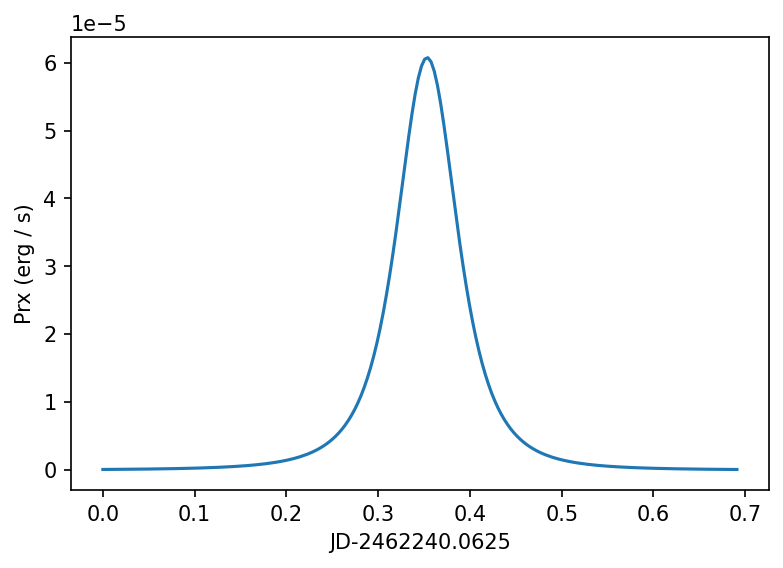

In [505]:
plt.figure(dpi=150)
plt.plot(df.datetime_jd-df.datetime_jd.min(),Prx)
plt.xlabel("JD-"+str(df.datetime_jd.min()))
plt.ylabel("Prx ("+str(Prx.unit)+")")

In [506]:
(u.mW/u.W).si

Unit(dimensionless with a scale of 0.001)

Text(0, 0.5, 'Prx (dBm)')

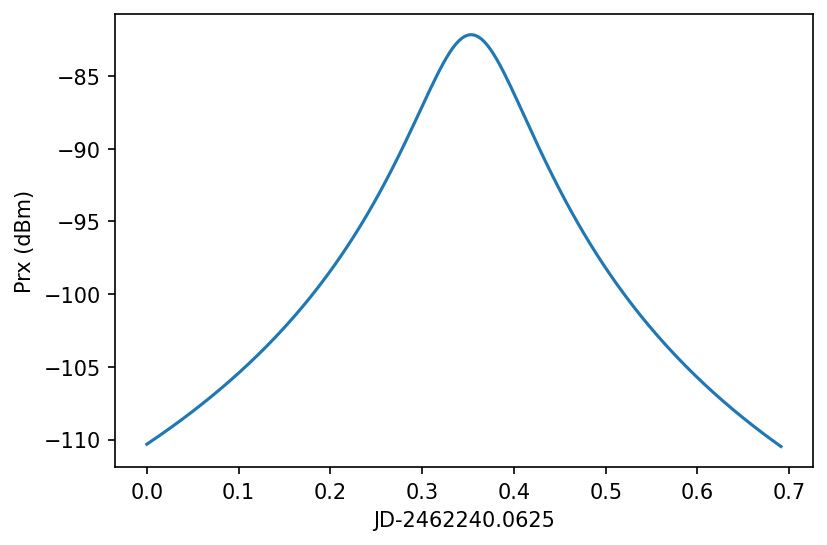

In [507]:
plt.figure(dpi=150)
plt.plot(df.datetime_jd-df.datetime_jd.min(),10*(np.log10(Prx/u.mW)).si)
plt.xlabel("JD-"+str(df.datetime_jd.min()))
plt.ylabel("Prx (dBm)")

Text(0, 0.5, 'Prx/Ptx ')

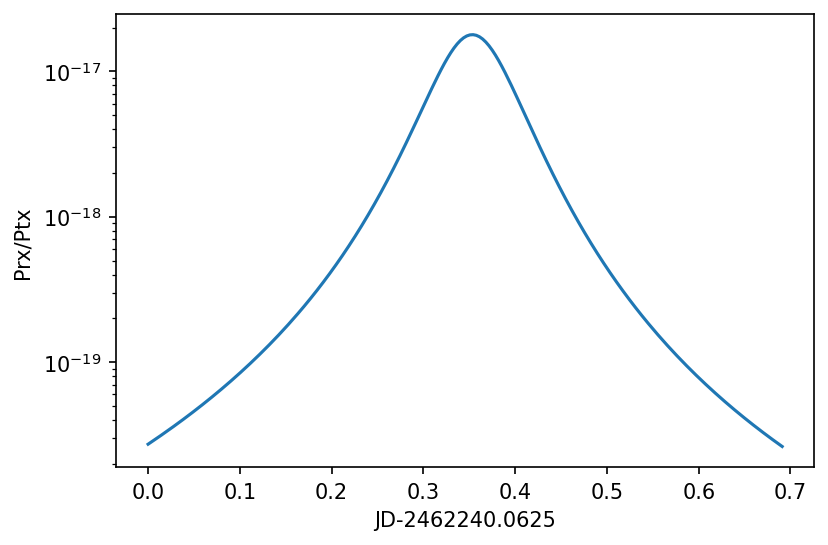

In [508]:
plt.figure(dpi=150)
plt.semilogy(df.datetime_jd-df.datetime_jd.min(),Prx.si/Ptx)
plt.xlabel("JD-"+str(df.datetime_jd.min()))
plt.ylabel("Prx/Ptx ")

In [509]:
((30*c.R_earth)/(1*u.AU)).cgs

<Quantity 0.00127905>

In [510]:
dl=pd.read_csv('subradar_points.csv')

In [511]:
dl

,Unnamed: 0,date,date_jd,ra,dec,lon,lat,lonR,latR
0,0,2029-Apr-13 13:30,2.462240e+06,20.17701,23.94602,-114.590194,-25.094418,-6.118579,-25.097152
1,1,2029-Apr-13 13:35,2.462240e+06,20.05465,23.87547,-114.453582,-25.047769,-7.077760,-25.050488
2,2,2029-Apr-13 13:40,2.462240e+06,19.93009,23.80346,-114.314466,-25.000088,-8.034434,-25.002791
3,3,2029-Apr-13 13:45,2.462240e+06,19.80327,23.72997,-114.172780,-24.951365,-8.988538,-24.954052
4,4,2029-Apr-13 13:50,2.462240e+06,19.67413,23.65493,-114.028450,-24.901544,-9.939998,-24.904212
...,...,...,...,...,...,...,...,...,...
195,195,2029-Apr-14 05:45,2.462241e+06,201.52165,-24.70663,63.922720,25.594497,-41.268510,25.595697
196,196,2029-Apr-14 05:50,2.462241e+06,201.39295,-24.63440,64.065894,25.547406,-42.221091,25.548571
197,197,2029-Apr-14 05:55,2.462241e+06,201.26684,-24.56342,64.206241,25.501060,-43.176497,25.502189
198,198,2029-Apr-14 06:00,2.462241e+06,201.14323,-24.49367,64.343855,25.455454,-44.134636,25.456548


In [512]:
time=pd.to_datetime(dl.date)

In [513]:
dt=(time.iloc[1]-time.iloc[0]).total_seconds()

In [514]:
lon=(dl.lonR.to_numpy())*u.deg.to(u.rad)
lat=(dl.latR.to_numpy())*u.deg.to(u.rad)

In [515]:
x=np.sin(lat)*np.cos(lon)
y=np.sin(lat)*np.sin(lon)
z=np.cos(lat)

In [516]:
pointing=np.vstack((x,y,z)).T
dtheta=np.arccos((pointing[1:]*pointing[:-1]).sum(axis=1))

In [517]:
period=2*np.pi/(dtheta/dt)*u.s

In [518]:
period

<Quantity [263960.20281411, 265025.40740799, 266121.49516825,
           267248.48143371, 268407.53834352, 269603.93502112,
           270836.43405331, 272099.15767935, 273407.34238943,
           274749.72570919, 276139.39380351, 277563.5168005 ,
           279036.10842018, 280554.48634875, 282121.00573661,
           283734.05632807, 285400.30522421, 287114.15786354,
           288886.49685382, 290713.35498646, 292594.11525424,
           294540.19341651, 296541.41829791, 298603.00540217,
           300730.15863592, 302923.78862386, 305174.28403117,
           307496.8727303 , 309881.51266202, 312330.44540386,
           314839.96755601, 317410.20010276, 320046.05903386,
           322722.85682563, 325454.93683574, 328231.33555716,
           331034.44869454, 333854.46798531, 336683.86245307,
           339499.19617003, 342282.00338959, 345009.38508796,
           347639.77240883, 350154.55142864, 352498.69867324,
           354628.17999501, 356490.37203924, 358023.33538361,
        

Text(0, 0.5, 'Rotation period (h)')

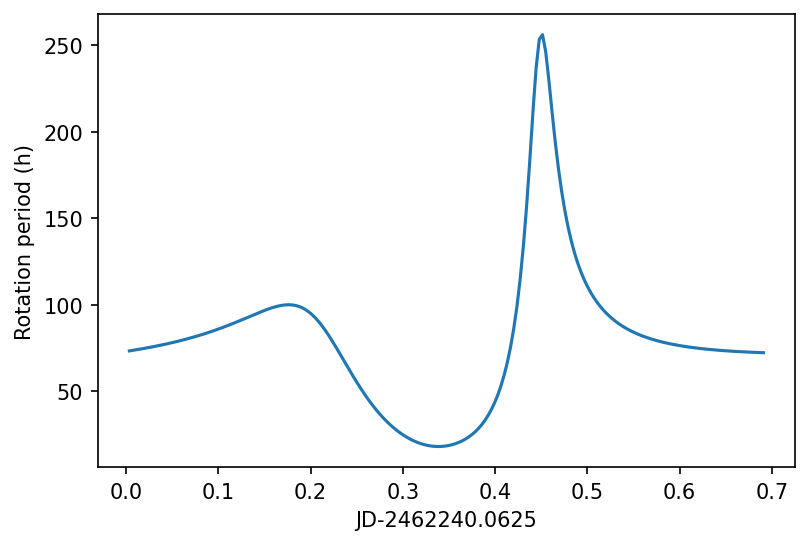

In [519]:
plt.figure(dpi=150)
plt.plot((df.datetime_jd-df.datetime_jd.min())[1:],(period).to(u.h))
plt.xlabel("JD-"+str(df.datetime_jd.min()))
plt.ylabel("Rotation period (h)")

In [520]:
phi=lat[1:]
bw=4*np.pi*np.cos(phi)*370*u.m/((c.c/freq)*period)

In [521]:
tau=(2*u.min).cgs

In [522]:
Nrms=(Tsys*c.k_B*np.sqrt(bw/tau)).cgs

In [523]:
Nrms

<Quantity [1.95673548e-16, 1.95317874e-16, 1.94953851e-16, 1.94581688e-16,
           1.94201142e-16, 1.93810548e-16, 1.93410582e-16, 1.93003579e-16,
           1.92584376e-16, 1.92157233e-16, 1.91717834e-16, 1.91270955e-16,
           1.90812041e-16, 1.90342351e-16, 1.89861445e-16, 1.89370217e-16,
           1.88866811e-16, 1.88353465e-16, 1.87827020e-16, 1.87289208e-16,
           1.86740656e-16, 1.86178192e-16, 1.85605517e-16, 1.85021471e-16,
           1.84424945e-16, 1.83816207e-16, 1.83198685e-16, 1.82568324e-16,
           1.81928671e-16, 1.81279595e-16, 1.80622666e-16, 1.79958352e-16,
           1.79285747e-16, 1.78612219e-16, 1.77934121e-16, 1.77254819e-16,
           1.76579316e-16, 1.75910319e-16, 1.75249806e-16, 1.74603768e-16,
           1.73976647e-16, 1.73373779e-16, 1.72804944e-16, 1.72273845e-16,
           1.71792966e-16, 1.71371748e-16, 1.71021493e-16, 1.70755605e-16,
           1.70585671e-16, 1.70531909e-16, 1.70610750e-16, 1.70838345e-16,
           1.71237208e-16

In [524]:
Prx[1:]/Nrms

<Quantity [4.91019409e+08, 5.09069862e+08, 5.27970976e+08, 5.47771077e+08,
           5.68523022e+08, 5.90287684e+08, 6.13123192e+08, 6.37086103e+08,
           6.62261975e+08, 6.88710435e+08, 7.16525955e+08, 7.45776091e+08,
           7.76569452e+08, 8.08999891e+08, 8.43175376e+08, 8.79206099e+08,
           9.17223649e+08, 9.57350033e+08, 9.99744352e+08, 1.04455292e+09,
           1.09193930e+09, 1.14210318e+09, 1.19521870e+09, 1.25150468e+09,
           1.31119883e+09, 1.37454977e+09, 1.44180249e+09, 1.51328196e+09,
           1.58927951e+09, 1.67014245e+09, 1.75623281e+09, 1.84795489e+09,
           1.94576422e+09, 2.05006504e+09, 2.16142151e+09, 2.28036677e+09,
           2.40745645e+09, 2.54332281e+09, 2.68866442e+09, 2.84417784e+09,
           3.01063988e+09, 3.18887530e+09, 3.37968834e+09, 3.58405921e+09,
           3.80285861e+09, 4.03707194e+09, 4.28770028e+09, 4.55574315e+09,
           4.84229457e+09, 5.14824569e+09, 5.47460503e+09, 5.82241338e+09,
           6.19250858e+09

Text(0, 0.5, 'SNR')

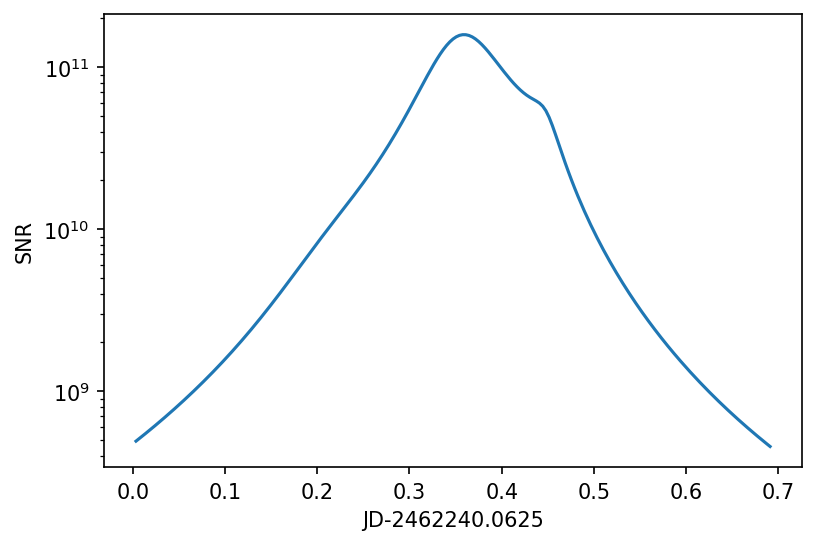

In [525]:
plt.figure(dpi=150)
plt.semilogy((df.datetime_jd-df.datetime_jd.min())[1:],Prx[1:]/Nrms)
plt.xlabel("JD-"+str(df.datetime_jd.min()))
plt.ylabel("SNR")

Text(0, 0.5, 'SNR')

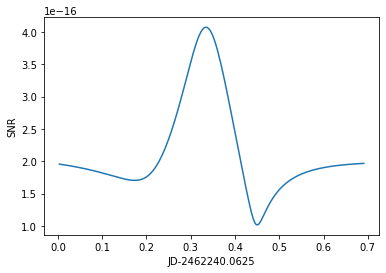

In [528]:
plt.plot((df.datetime_jd-df.datetime_jd.min())[1:],Nrms)
plt.xlabel("JD-"+str(df.datetime_jd.min()))
plt.ylabel("Nrms (erg/s)")